## Importar librerias

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Manuela Lizcano (Analisis de Datos)

Carga de datos

In [2]:
df = pd.read_csv("C:\\IIND VIII-ISISVI\\ANALITICA\\Proyecto\\datos_apartamentos_rent.csv", sep=";", encoding='latin1')  

In [3]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


Perfilamiento de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

Comentarios: Podemos notar que las variables de amenities, bathrooms, bedrooms, pets_allowed, address, cityname, state, latitud y longitude contienen datos sin valor. 

Tamaño de los datos por naturaleza son 10000. 
De todas las variables 4 columnas contienen datos decimales, 4 columnas contienen datos numericos y 14 columnas continen valores categoricos. 

In [5]:
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


Analisis de variables numericas

Primero vamos a realizar una analisis de las variables numericas las cuales para este conjunto de datos son id, bathrooms, bedrooms, price, square_feet, latitud, longitude, time

In [6]:
variables_num=df.select_dtypes(include=[np.number])
variables_num_list=variables_num.columns.tolist()


In [8]:
filtrado=["price", "id"]
variables_num_list_filtrado=[v for v in variables_num_list if v not in filtrado]
print(variables_num_list_filtrado)

['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude', 'time']


Relación entre características numéricas y objetivo:


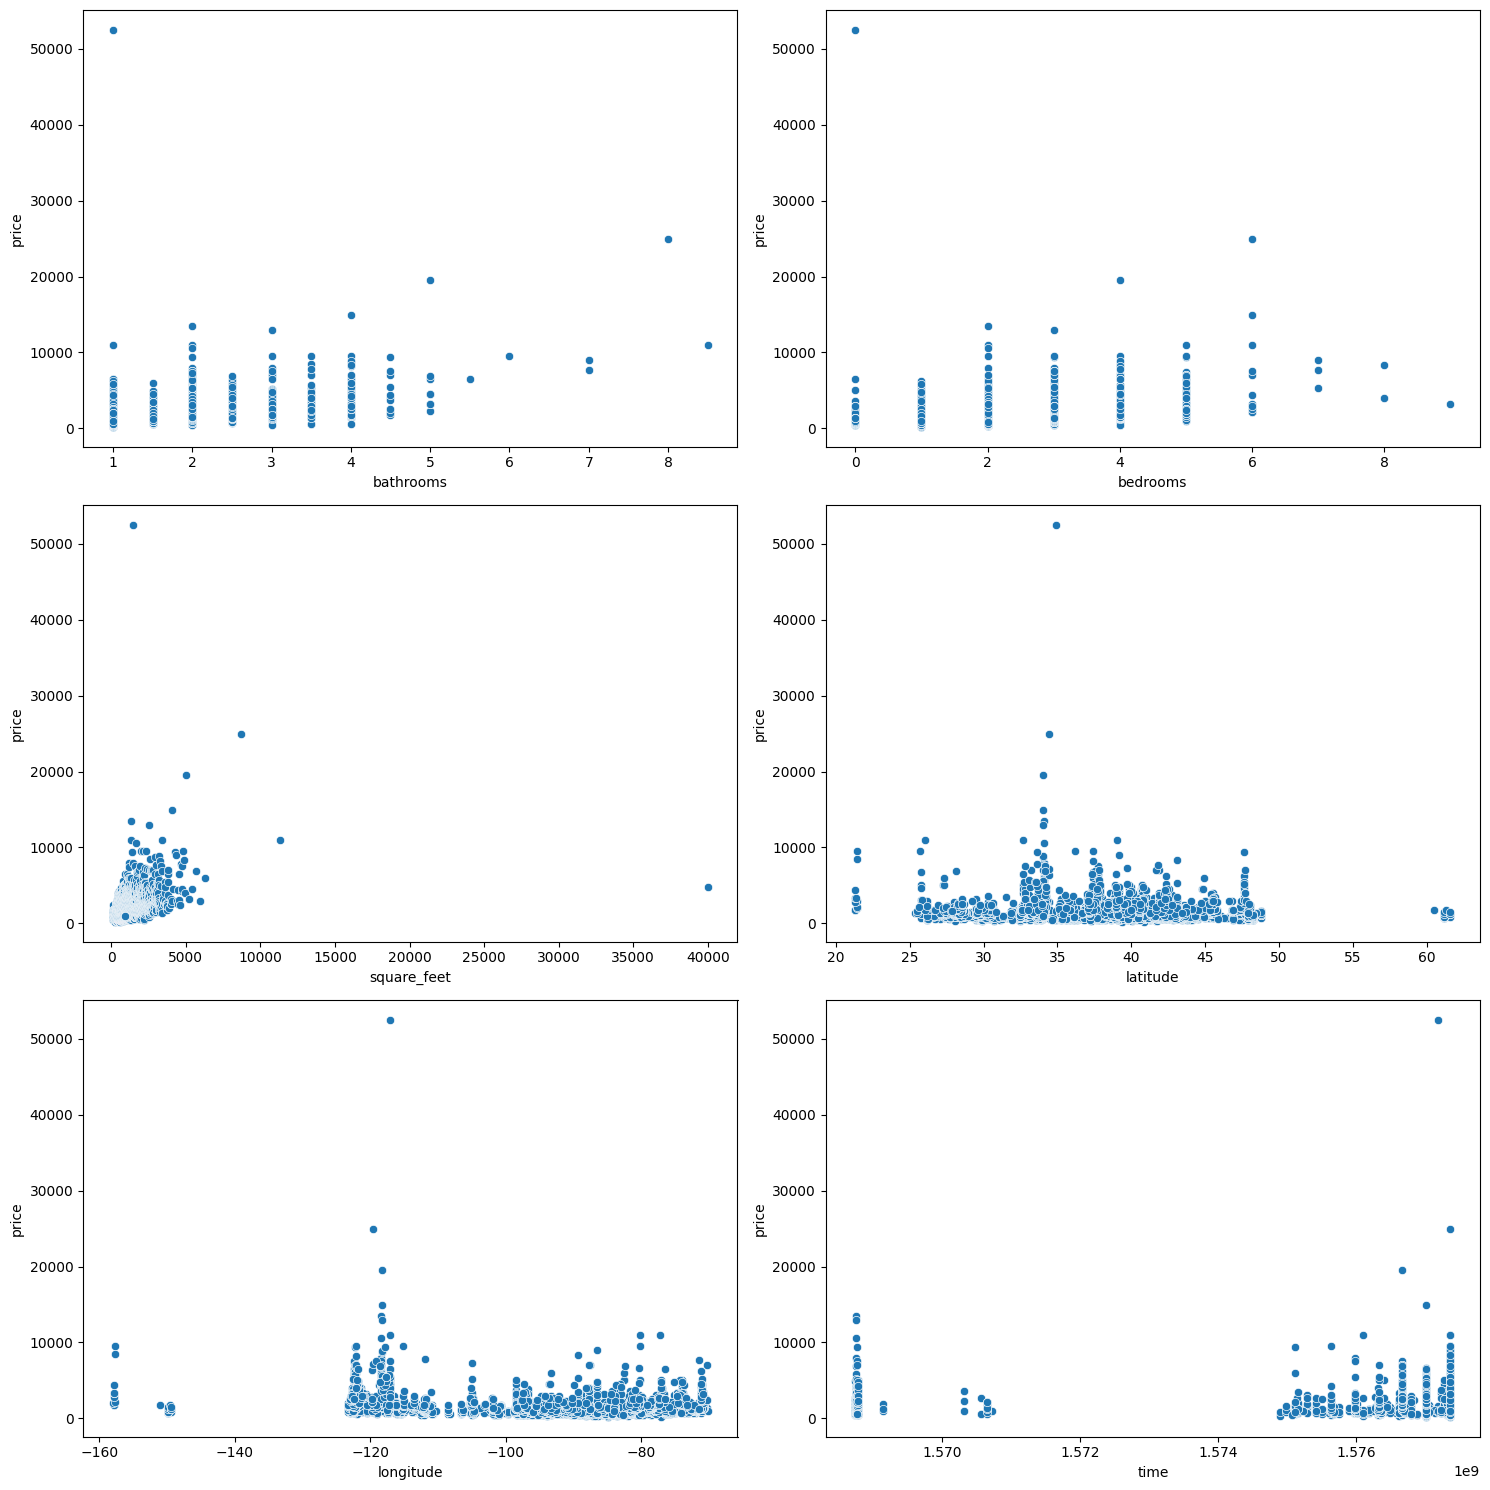

In [9]:
print('Relación entre características numéricas y objetivo:')

graficos_por_fila = 2

fig, axes = plt.subplots(nrows=(len(variables_num_list_filtrado) + graficos_por_fila - 1) // graficos_por_fila,
                         ncols=graficos_por_fila,
                         figsize=(15, 5 * ((len(variables_num_list_filtrado) + graficos_por_fila - 1) // graficos_por_fila)))

axes = axes.flatten()
for i, caracteristica in enumerate(variables_num_list_filtrado):
    sns.scatterplot(data=df, x=caracteristica, y='price', ax=axes[i])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [10]:
filtrado=[ "id"]

variables_num_list_filtrado1=[v for v in variables_num_list if v not in filtrado]


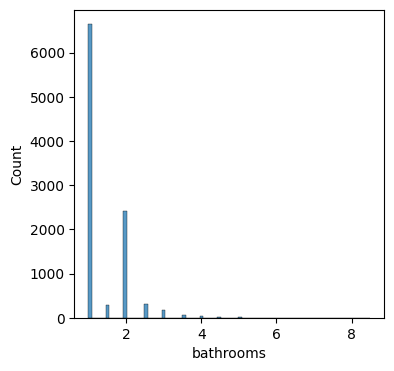

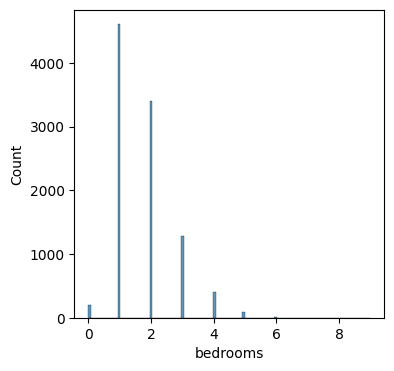

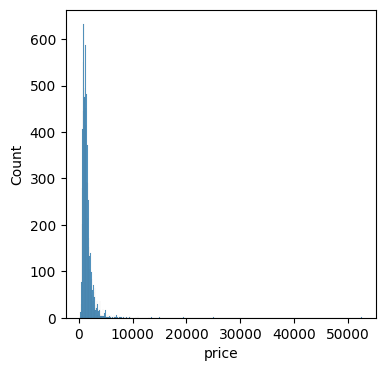

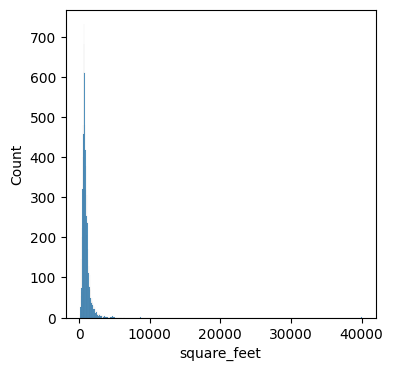

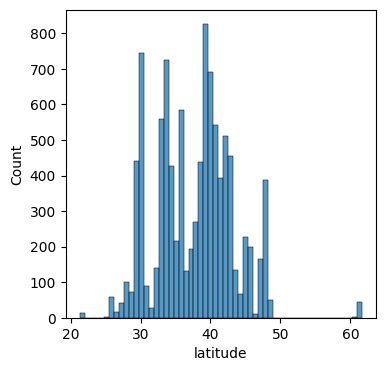

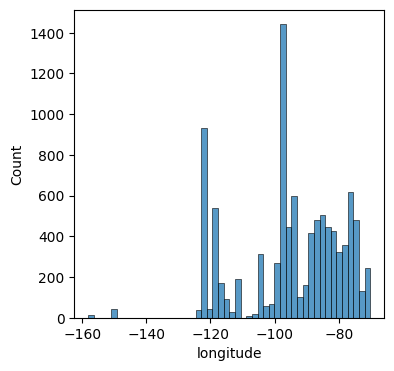

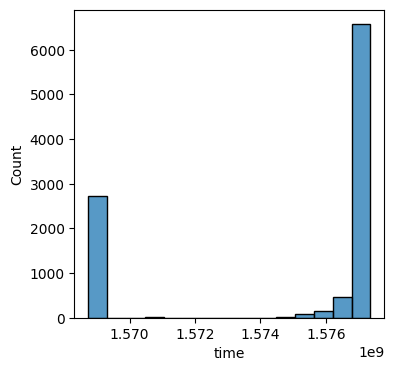

In [11]:
df_hist = df[variables_num_list_filtrado1]
for col in df_hist.columns:
    plt.figure(figsize=(4,4))
    plt.tight_layout()
    sns.histplot(df_hist[col])

De estas graficas podemos ver diferentes relaciones que se presentan en los datos: 
1. Bathrooms: Se puede ver una tendencia de mientras el apartamento cuente con una mayor cantidad de baños, el precio de este aumenta. De igual manera el set de datos contiene un dato anomalo considerando que a pesar de que tiene 1 baño el precio de este apartamento es considerablemente mayor a los demas valores.
2. Beds: De esta variable podemos ver que no hay una relacion muy clara entre el numero de habitaciones de una habitacion con respecto al precio de este inmueble. Para esta variable tambien existe un posible dato anomalo considerando que a pesar de que cuenta con solo una habitacion, este apartamento tiene un precio considerablemente mayor al resto de apartamentos. 
3. Square_feet: Para esta variable se puede ver una clara relaciona entre el precio y el tamaño del apartamento, se puede ver una relacion lineal entre las dos variables. Para esta variable existen dos datos que pueden representar outliers, considerando que para un caso el tamaño del apartamento es muy pequeño para un precio tan alto y de igual manera se presenta un dato de una apartamento bastante grande con un precio considerablemente menor. 
4. Latitud: Se puede ver una alta concentracion de apartamentos entre las longitudes de 25 y 50. Se puede ver que para los apartamentos que se encuentran cerca de 35 el precio es mucho mayor. 
5. Longitud: Se puede ver una alta concentracion de los apartamento entre los longitudes entre -120 y -80. Se puede ver que los apartamentos en la longitud de -120 el precio de mucho mayor con respecto al resto de datos del conjunto. 
6. Time: Se puede ver que la relacion entre el precio de venta del apartamento y hace cuanto tiempo fue creado en anuncio no es tan claro. 

Analisis de variables categoricas

In [12]:
variables_cat=df.select_dtypes(include=[object])
variables_cat_list=variables_cat.columns.tolist()
print(variables_cat_list)

['category', 'title', 'body', 'amenities', 'currency', 'fee', 'has_photo', 'pets_allowed', 'price_display', 'price_type', 'address', 'cityname', 'state', 'source']


In [13]:
for i in variables_cat_list:
    print(df[i].value_counts())
    print("")

category
housing/rent/apartment     9996
housing/rent/home             2
housing/rent/short_term       2
Name: count, dtype: int64

title
Apartment in great location                           40
Super Cute! Apartment for Rent!                       32
Apartment in prime location                           31
This Apartment is a must see!                         27
Apartment in quiet area, spacious with big kitchen    26
                                                      ..
Four BR 1602 Greenwood Drive                           1
Four BR 5972 VALLEY MEADOW CT                          1
Four BR 1308 E. Atwater Ave                            1
Five BR 16411 Jadestone Terrace Ln                     1
Four BR 6347 E. Ironwood Dr                            1
Name: count, Length: 9350, dtype: int64

body
When searching for a pet-friendly One-, Two- and 3 Beds apartment homes in Randallstown, look no further than Northwest Crossing. Northwest Crossing's convenient suburban. and Liberty provi

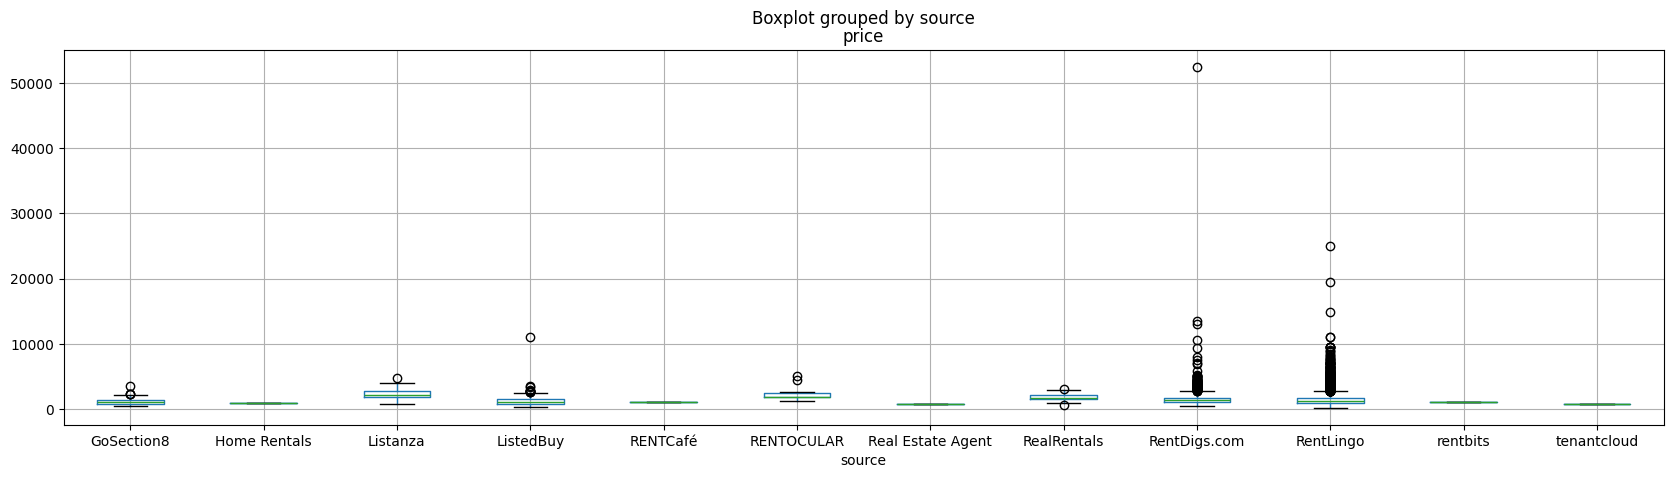

In [14]:
df.boxplot(column='price', by='source', figsize=(20, 5))
plt.show()

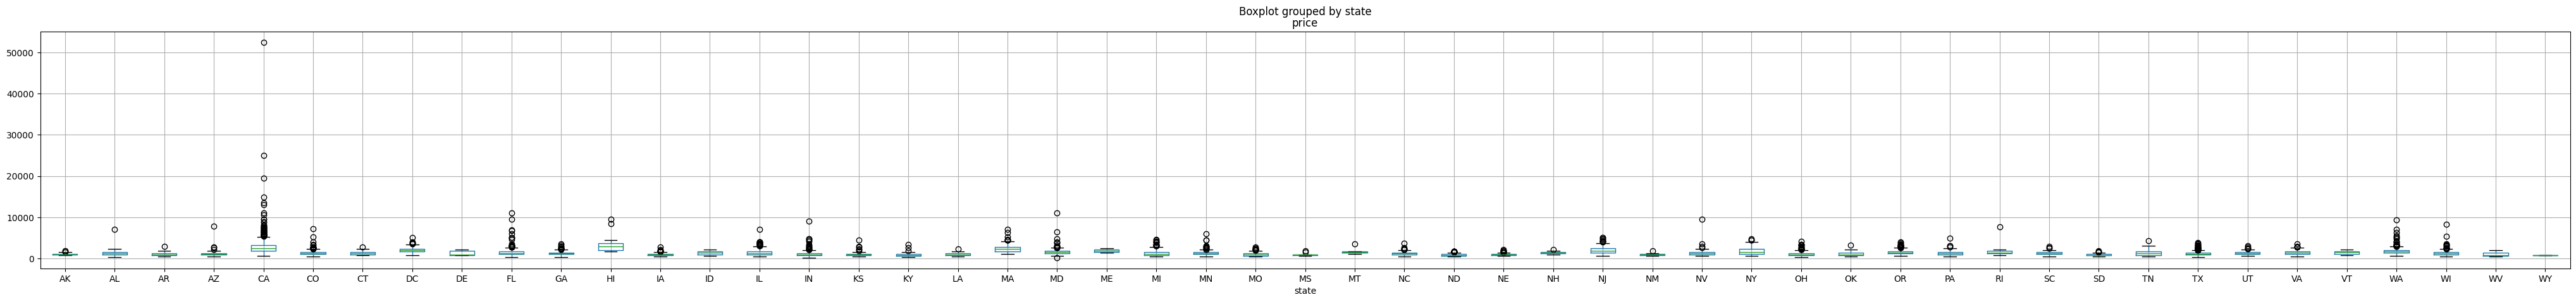

In [15]:
df.boxplot(column='price', by='state', figsize=(50, 5))
plt.show()

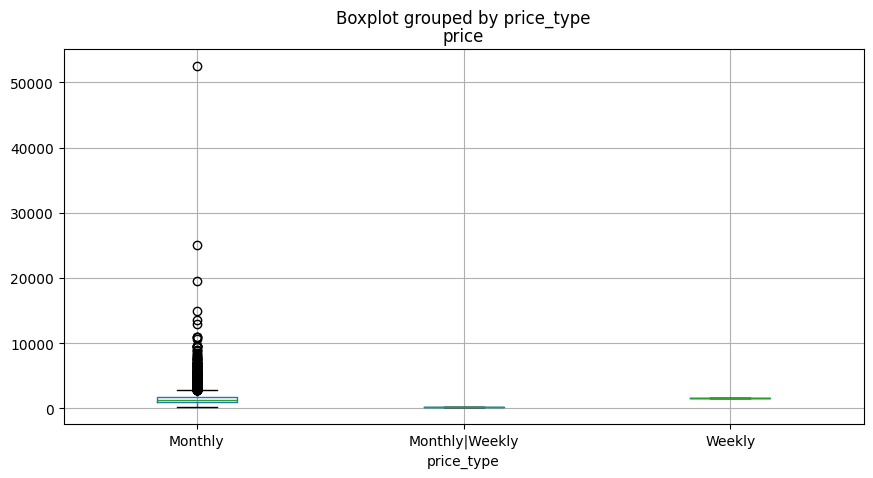

In [16]:
df.boxplot(column='price', by='price_type', figsize=(10, 5))
plt.show()

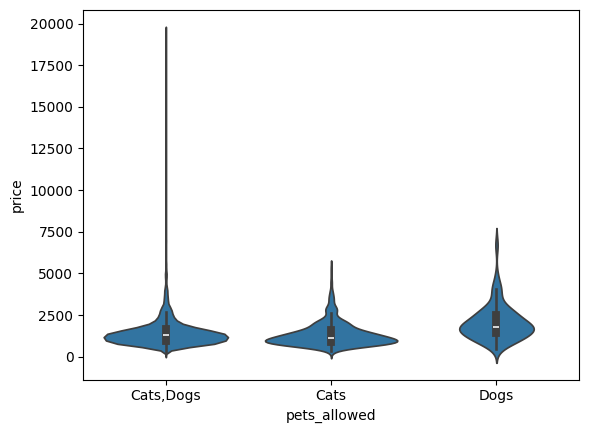

In [17]:
sns.violinplot(data=df, x='pets_allowed', y='price')
plt.show()

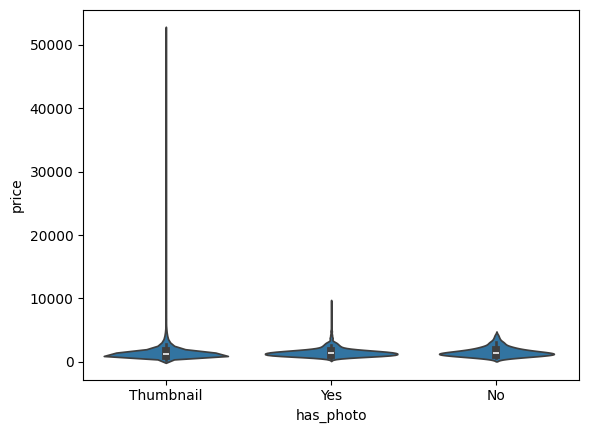

In [18]:
sns.violinplot(data=df, x='has_photo', y='price')
plt.show()

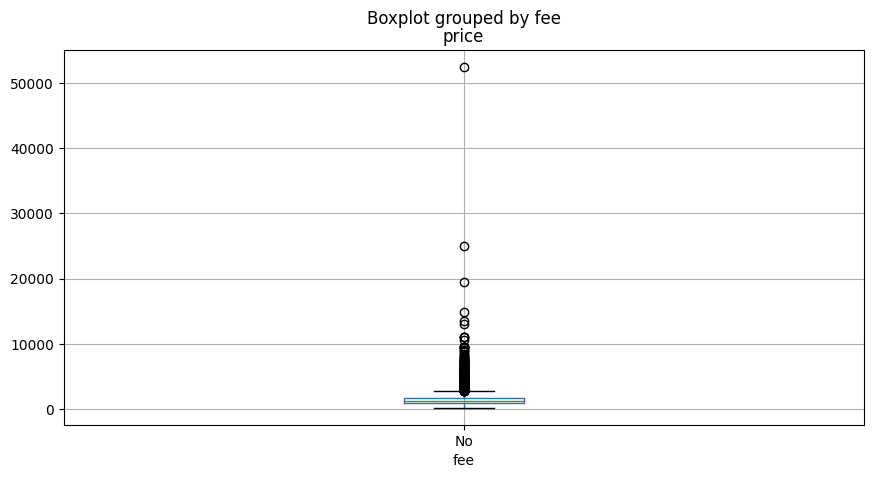

In [19]:
df.boxplot(column='price', by='fee', figsize=(10, 5))
plt.show()

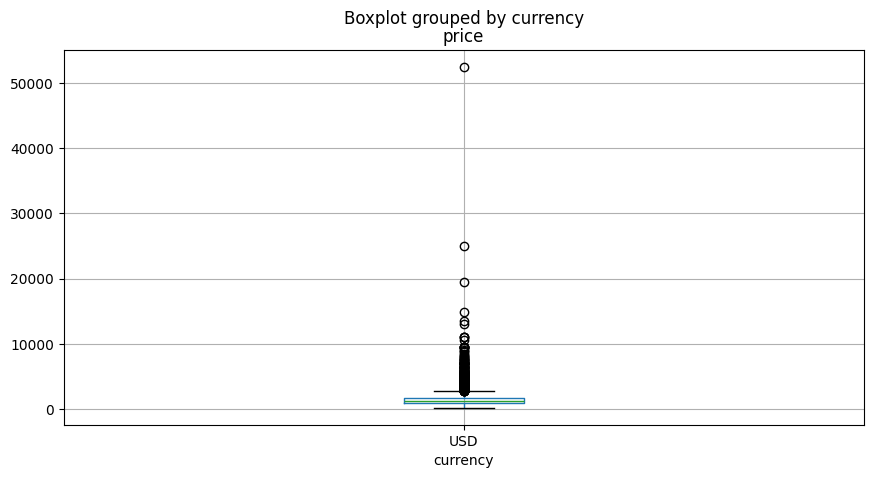

In [20]:
df.boxplot(column='price', by='currency', figsize=(10, 5))
plt.show()

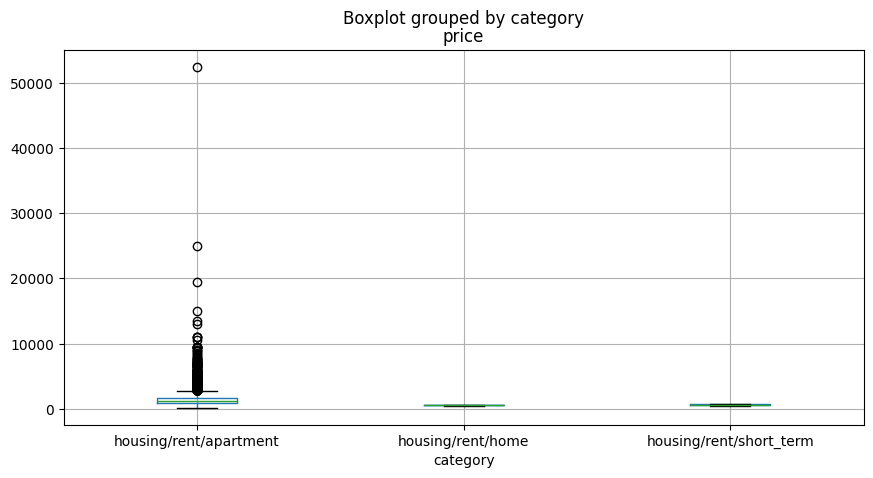

In [21]:
df.boxplot(column='price', by='category', figsize=(10, 5))
plt.show()